Design of a Classification-Based Machine Learning Model for Star Classification and Hertzsprung-Russell Diagram development.

**1. Importing all the libraries.**

In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import LabelEncoder

**2. Data Cleaning**

Here, first we read our original dataset "Main_dataset.csv". The name of the dataset in reality is "hygdata_v40.csv", but for simplicity we have named it like "Main_dataset.csv", which is nothing but a rename of "hygdata_v40.csv".

Since the dataset contained 37 features, those which were not required were dropped.
Also, some entries had erronous values, which were also dropped.

Also, we have made another csv file for test purpose, hence we had to modify our below code snippet.

In [10]:
df = pd.read_csv("Main_dataset.csv")

##Note:
#BEFORE RUNNING THE COMMENTED CODE SNIPPET, KINDLY RUN IT IN THE STEPS MENTIONED:
#1. FIRST UNCOMMENT SNIPPET 1 AND RUN IT.
#2. NOW COMMENT SNIPPET 1 AND UNCOMMENT SNIPPET 2 AND RUN IT.


#_____SNIPPET-1_____#
#df_cleaned = df.drop(columns =['hip','hd','hr','gl','bf','ra','dec','dist','pmra', 'pmdec','rv', 'x', 'y', 'z', 'vx', 'vy','vz','rarad','decrad','pmrarad', 'pmdecrad', 'bayer', 'flam', 'con', 'comp', 'comp_primary', 'base', 'var', 'var_min', 'var_max'])
#df_cleaned = df_cleaned.dropna()
#df_cleaned['spect'] = df_cleaned['spect'].str[0]
#df_cleaned = df_cleaned[~df_cleaned['spect'].str.islower()]
#df_cleaned = df_cleaned.to_csv('test_data.csv', index=False)


#____SNIPPET-2_____#
#dfc = df.drop(columns = ['hip','hd','hr','gl','bf','proper','ra','dec','dist','pmra', 'pmdec','rv', 'x', 'y', 'z', 'vx', 'vy','vz','rarad','decrad','pmrarad', 'pmdecrad', 'bayer', 'flam', 'con', 'comp', 'comp_primary', 'base', 'var', 'var_min', 'var_max'])
#dfc = dfc.dropna()
#dfc['spect'] = dfc['spect'].str[0]
#dfc = dfc[~dfc['spect'].str.islower()]
#dfc = dfc.to_csv('training_data.csv', index=False)
#print(len(dfc))

**3. Model Training**

In [12]:
training_data = pd.read_csv("training_data.csv")

#Features included in our model
X = training_data[['mag', 'absmag', 'spect', 'ci', 'lum']]
y = training_data['spect']

if X['spect'].dtype == 'object':
    encoder = LabelEncoder()
    X.loc[:, 'spect'] = encoder.fit_transform(X['spect'])

#Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#Random Forest Model
model = RandomForestClassifier(n_estimators=100, random_state=42, max_depth=10)

model.fit(X_train, y_train)

y_pred = model.predict(X_test)

print("Classification Report:")
print(classification_report(y_test, y_pred))

Classification Report:
              precision    recall  f1-score   support

           A       1.00      1.00      1.00      3743
           B       1.00      1.00      1.00      2051
           C       0.97      1.00      0.98        29
           D       1.00      0.97      0.98        32
           F       1.00      1.00      1.00      5146
           G       1.00      1.00      1.00      4491
           K       1.00      1.00      1.00      6372
           M       1.00      1.00      1.00      1026
           N       1.00      1.00      1.00        11
           O       1.00      1.00      1.00        49
           R       0.93      0.93      0.93        14
           S       0.75      1.00      0.86         3
           W       1.00      0.93      0.96        14

    accuracy                           1.00     22981
   macro avg       0.97      0.99      0.98     22981
weighted avg       1.00      1.00      1.00     22981



**4. Confusion Matrix**

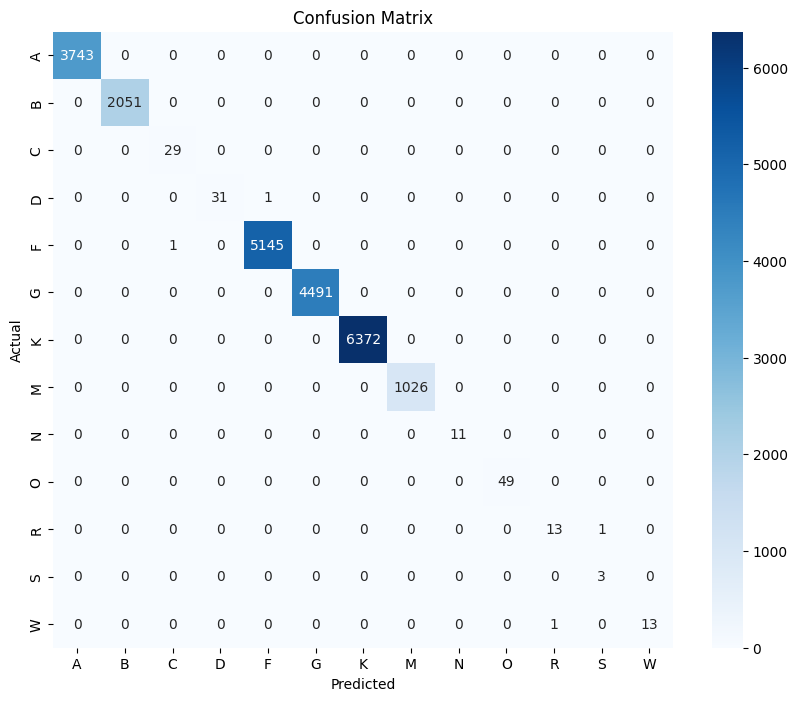

In [13]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

class_labels = sorted(list(set(y_test) | set(y_pred)))

# Confiusion Matrix
cm = confusion_matrix(y_test, y_pred)

# Plotting
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

**5. Performing Cross-Validation**

In [20]:
from sklearn.model_selection import cross_val_score

# Performing 5-fold cross validation
scores = cross_val_score(RandomForestClassifier(), X_train, y_train, cv=5)
print("Cross-validation scores:", scores)
print("Mean CV score:", scores.mean())

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:776: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(


Cross-validation scores: [0.99940169 0.99983682 0.99972802 0.99978242 0.99989121]
Mean CV score: 0.9997280326532894


**6. Plotting the Hertzsprung-Russell diagram**

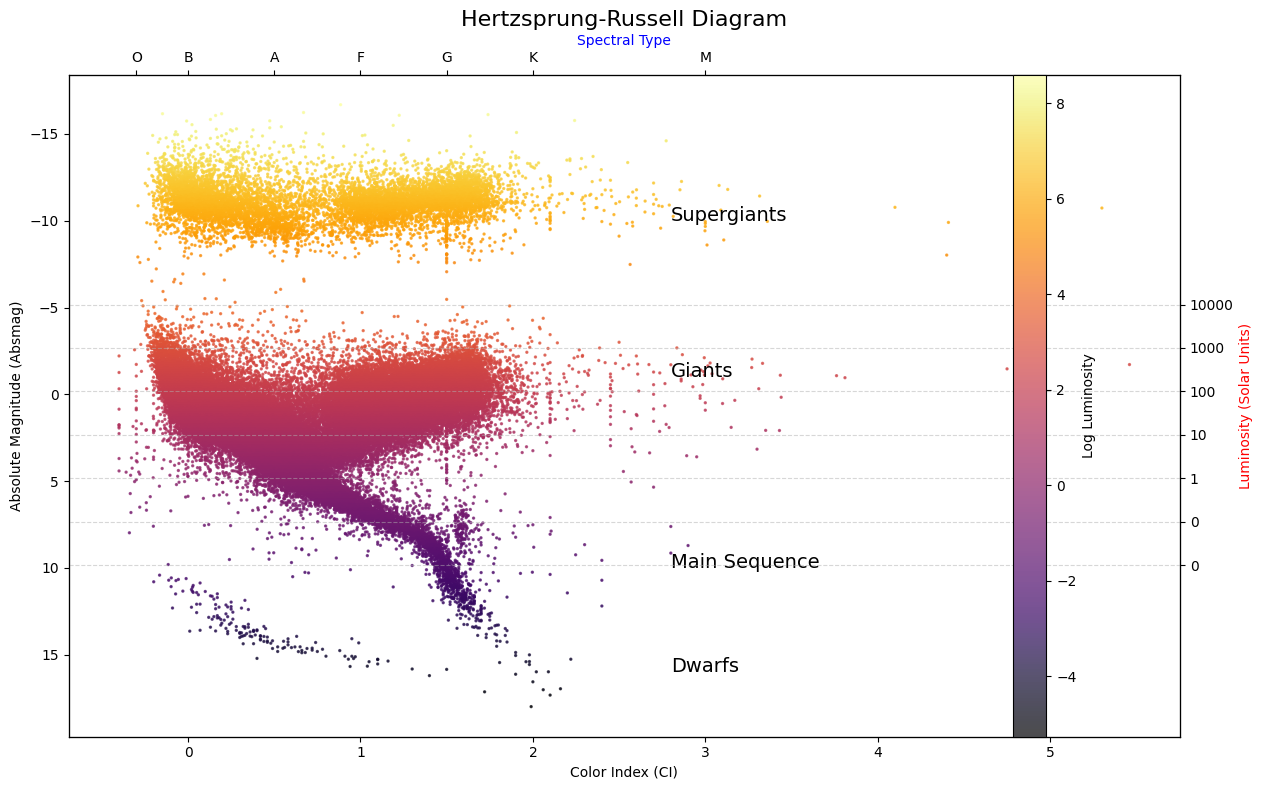

In [16]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

data = pd.read_csv("training_data.csv")

lum_sun = 3.828e26  # Solar luminosity in Watts

data['lum'] = 10 ** ((4.83 - data['absmag']) / 2.5)

def color_index_to_spectral_type(ci):
    if ci < -0.3:
        return 'O'
    elif -0.3 <= ci < 0:
        return 'B'
    elif 0 <= ci < 0.5:
        return 'A'
    elif 0.5 <= ci < 1:
        return 'F'
    elif 1 <= ci < 1.5:
        return 'G'
    elif 1.5 <= ci < 2:
        return 'K'
    else:
        return 'M'

data['spectral_type'] = data['ci'].apply(color_index_to_spectral_type)

fig, ax1 = plt.subplots(figsize=(12, 8))

scatter = ax1.scatter(data['ci'], data['absmag'], c=np.log10(data['lum']),
                      cmap='inferno', s=2, alpha=0.7)

ax1.invert_yaxis()
ax1.set_xlabel('Color Index (CI)')
ax1.set_ylabel('Absolute Magnitude (Absmag)', color='black')

ax2 = ax1.twiny()
ax2.set_xlim(ax1.get_xlim())

spectral_ticks = [-0.3, 0, 0.5, 1, 1.5, 2, 3]
spectral_labels = ['O', 'B', 'A', 'F', 'G', 'K', 'M']
ax2.set_xticks(spectral_ticks)
ax2.set_xticklabels(spectral_labels)
ax2.set_xlabel('Spectral Type', color='blue')

ax3 = ax1.twinx()
ax3.set_ylim(ax1.get_ylim())
lum_ticks = [0.01, 0.1, 1, 10, 100, 1000, 10000]
mag_ticks = 4.83 - 2.5 * np.log10(lum_ticks)
ax3.set_yticks(mag_ticks)
ax3.set_yticklabels([f"{l:.0f}" for l in lum_ticks])
ax3.set_ylabel('Luminosity (Solar Units)', color='red')

cbar = plt.colorbar(scatter, ax=ax1, orientation='vertical', pad=0.1)
cbar.set_label('Log Luminosity')

plt.title('Hertzsprung-Russell Diagram', fontsize=16)
plt.grid(True, linestyle='--', alpha=0.5)

ax1.text(2.8, -1, 'Giants', color='black', fontsize=14, ha='left')
ax1.text(2.8, 16, 'Dwarfs', color='black', fontsize=14, ha='left')
ax1.text(2.8, 10, 'Main Sequence', color='black', fontsize=14, ha='left')
ax1.text(2.8, -10, 'Supergiants', color='black', fontsize=14, ha='left')

plt.tight_layout()
plt.show()